<a href="https://colab.research.google.com/github/DrVishalChaudhary/_DeepLearningProjects/blob/main/Transfer_Learning_Feature_Extraction_for_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification using transfer learning

* Feature extraction using existing trained models

* Models: efficientnet



In [1]:
# Library Import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import os

In [2]:
# Data path
data_dir = "/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog"

train_data_path = data_dir + '/Train/'
test_data_path = data_dir + '/Test/'

In [3]:
train_data_path

'/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog/Train/'

In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog/Train/"

Cat  Dog


In [5]:
# Average dimension for Cat images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/Cat'):
  img = imread(train_data_path + '/Cat/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [6]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(357.7486548808609, 413.9631053036126)

In [7]:
# Average dimension for Dog images
first_dim1 = []
second_dim1 = []
for image_no in os.listdir(train_data_path + '/Dog'):
  img = imread(train_data_path + '/Dog/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim1.append(d1)
  second_dim1.append(d2)

In [8]:
first_dim1_mean = np.mean(first_dim1)
second_dim1_mean = np.mean(second_dim1)
first_dim1_mean, second_dim1_mean

(364.63720215219064, 397.56879323597235)

In [9]:
# First dimension average value
(358 + 364)/2

361.0

In [10]:
# Second dimension average value
(414+399)/2

406.5

In [11]:
input_shape = (361, 406, 3)

#Augmented and Non-Augmented data

* train_data and test_data: Non-augmented data

* train_data_augmented and test_data_augmented: Augmented data

In [12]:
#Train and Test data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')

Found 2602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [13]:
# Train and Test data with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                                    width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen_augmented = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')
test_data_augmented = test_datagen_augmented.flow_from_directory(test_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')

Found 2602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Model1: efficientnetB0

* Non-augmentation

In [14]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [15]:
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

feature_extracted_layer2 = hub.KerasLayer(efficientnet_url, trainable = False, input_shape = input_shape)

model1 = Sequential()
model1.add(feature_extracted_layer2)
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

efficientnet_history = model1.fit(train_data, epochs = 20, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps=len(test_data))

Epoch 1/20
82/82 [==============================] - 150s 2s/step - loss: 0.2314 - accuracy: 0.9327 - val_loss: 0.0985 - val_accuracy: 0.9700
Epoch 2/20
82/82 [==============================] - 33s 402ms/step - loss: 0.0623 - accuracy: 0.9900 - val_loss: 0.0655 - val_accuracy: 0.9750
Epoch 3/20
82/82 [==============================] - 33s 401ms/step - loss: 0.0412 - accuracy: 0.9927 - val_loss: 0.0529 - val_accuracy: 0.9800
Epoch 4/20
82/82 [==============================] - 33s 400ms/step - loss: 0.0316 - accuracy: 0.9962 - val_loss: 0.0468 - val_accuracy: 0.9825
Epoch 5/20
82/82 [==============================] - 33s 401ms/step - loss: 0.0258 - accuracy: 0.9958 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 6/20
82/82 [==============================] - 33s 400ms/step - loss: 0.0222 - accuracy: 0.9973 - val_loss: 0.0413 - val_accuracy: 0.9825
Epoch 7/20
82/82 [==============================] - 33s 401ms/step - loss: 0.0193 - accuracy: 0.9973 - val_loss: 0.0398 - val_accuracy: 0.9850
E

In [16]:
model1.evaluate(test_data)

13/13 [==============================] - 5s 332ms/step - loss: 0.0386 - accuracy: 0.9850


[0.038563307374715805, 0.9850000143051147]

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


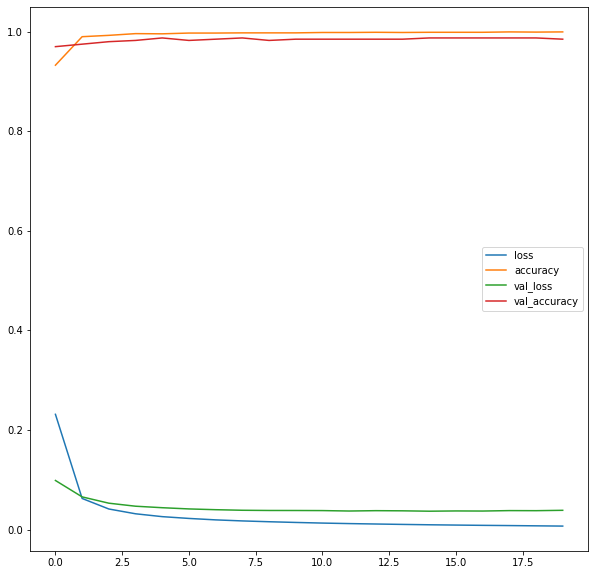

In [18]:
pd.DataFrame(efficientnet_history.history).plot(figsize = (10,10))

# Model2: efficientnetB0

* Augmentation

In [19]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [20]:
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

feature_extracted_layer2 = hub.KerasLayer(efficientnet_url, trainable = False, input_shape = input_shape)

model2 = Sequential()
model2.add(feature_extracted_layer2)
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')

efficientnet_history1 = model2.fit(train_data_augmented, epochs = 20, steps_per_epoch=len(train_data_augmented), 
                                   validation_data = test_data_augmented, validation_steps=len(test_data_augmented))

Epoch 1/20
82/82 [==============================] - 115s 1s/step - loss: 0.1868 - accuracy: 0.9712 - val_loss: 0.0902 - val_accuracy: 0.9775
Epoch 2/20
82/82 [==============================] - 105s 1s/step - loss: 0.0621 - accuracy: 0.9873 - val_loss: 0.0618 - val_accuracy: 0.9825
Epoch 3/20
82/82 [==============================] - 107s 1s/step - loss: 0.0433 - accuracy: 0.9908 - val_loss: 0.0511 - val_accuracy: 0.9825
Epoch 4/20
82/82 [==============================] - 109s 1s/step - loss: 0.0332 - accuracy: 0.9919 - val_loss: 0.0458 - val_accuracy: 0.9800
Epoch 5/20
82/82 [==============================] - 106s 1s/step - loss: 0.0286 - accuracy: 0.9931 - val_loss: 0.0468 - val_accuracy: 0.9825
Epoch 6/20
82/82 [==============================] - 107s 1s/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0415 - val_accuracy: 0.9850
Epoch 7/20
82/82 [==============================] - 107s 1s/step - loss: 0.0263 - accuracy: 0.9923 - val_loss: 0.0410 - val_accuracy: 0.9825
Epoch 8/20
82

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,845
Trainable params: 1,281
Non-trainable params: 4,049,564
_________________________________________________________________


In [22]:
model2.evaluate(test_data_augmented)

13/13 [==============================] - 5s 335ms/step - loss: 0.0428 - accuracy: 0.9875


[0.042797304689884186, 0.987500011920929]

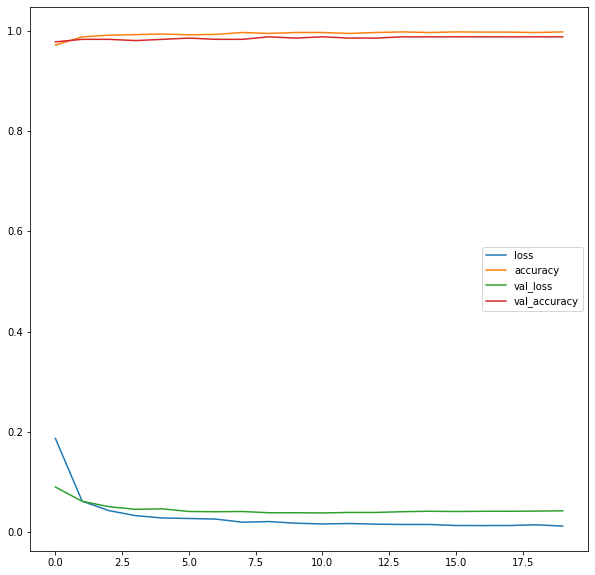

In [23]:
pd.DataFrame(efficientnet_history1.history).plot(figsize = (10,10))